## Download the Image

In [1]:
import requests
url = "https://cdn.pixabay.com/photo/2020/12/27/12/07/sunrise-5863751_1280.png"
r = requests.get(url)
with open('image.jpg', 'wb') as f:
    f.write(r.content) 

## Read the Image and Get its Center

Let's import all the modules and libraries first.

In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

First of all, we will read the image and get the center of the image. This center will act as the reference coordinate for rotating the image in any angle.

In [3]:
# first step, reading the image
image = cv2.imread('image.jpg')

# we need the image center for rotating it correctly
# we can get that using width/2, height/2
height, width = image.shape[:2]
center = (width/2, height/2)

Let's take a look at the image that we will be using.

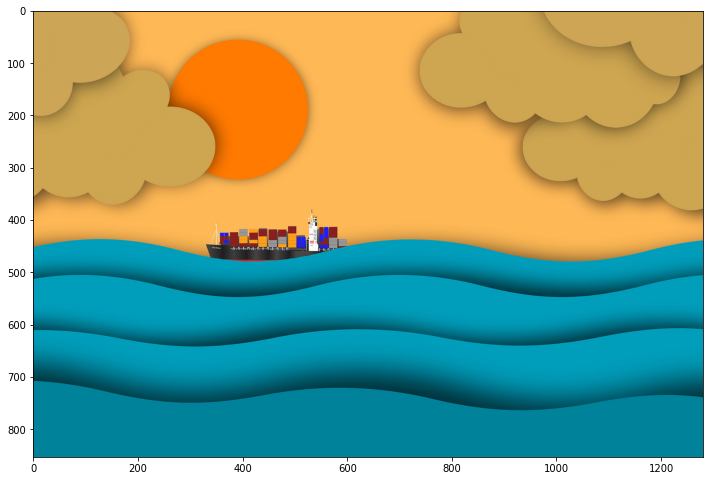

In [4]:
plt.imshow(image[:, :, ::-1])

## Get the 2D Rotation Matrix

We also need the 2D rotation matrix which will define how the image will be rotated. The important information that it holds is the angle by the image will be rotated.

In [5]:
# the above center is the center of rotation axis
# we can use cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)

The `center` argument takes the image center which we have defined above. The `angle` argument is the angle by which the image will be rotated. The final argument is the `scale`. This tells if we want to change the scale of the resulting image after rotation. A value greater than 1 will result in a zoomed in larger image.

The next step is to use `cv2.warpAffine()` to rotate the image using the information stores in the 2D rotation matrix.

In [6]:
# next, rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))

## Show the Image and Save the Result

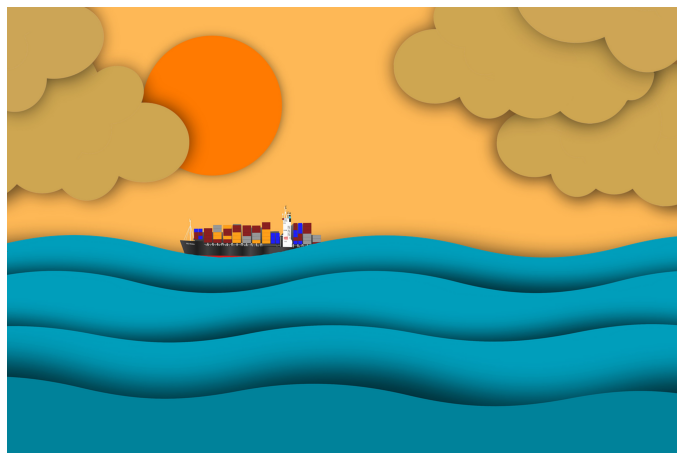

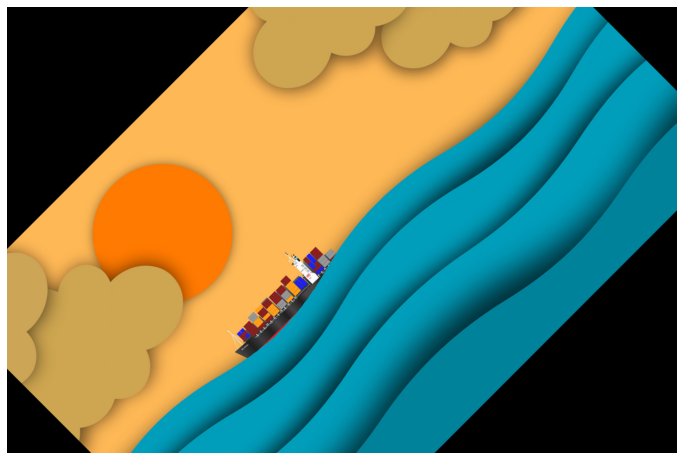

True

In [7]:
plt.imshow(image[:, :, ::-1])
plt.axis('off')
plt.show()
print('\n')
plt.imshow(rotated_image[:, :, ::-1])
plt.axis('off')
plt.show()
# we can also write the rotated image to disk
cv2.imwrite('rotated_image.jpg', rotated_image)

## Image Translation

### Prepare the Translation Matrix

We are going to shift the image a quarter way down the y-axis and a quarter way right of the x-axis. The translation matrix is going to be a NumPy array.

In [8]:
# for translation we need:
# tx: how much units we want to move the image in x-direction
# ty: how much units we want to move the image in y-direction
tx, ty = width / 4, height / 4 # you divide by value of your choice
# create the translation matrix using tx and ty, it is a NumPy array 
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)

You can use any value that you want in place of `tx` and `ty`. I have taken the above values so that we can know for sure that the algorithm is actually working the way we want it to.

### Translate the Image

Translate the image using `cv2.warpAffine()`. The `warpAffine()` function will apply the affine transformation to the image using the translation matrix. The resulting image will have the same size as the original image which is defined by the `dsize` argument.

In [9]:
# apply the translation to the image
translated_image = cv2.warpAffine(
    src=image, M=translation_matrix, dsize=(width, height)
)

## Show and Save the Image
The final step is to visualize the image. We can also save the image for later analysis.

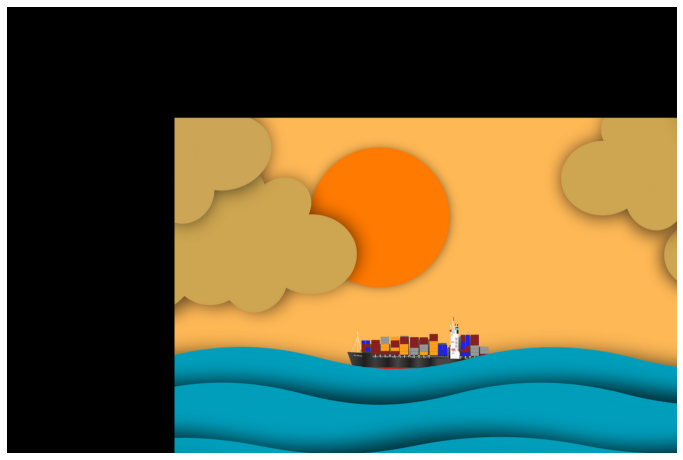

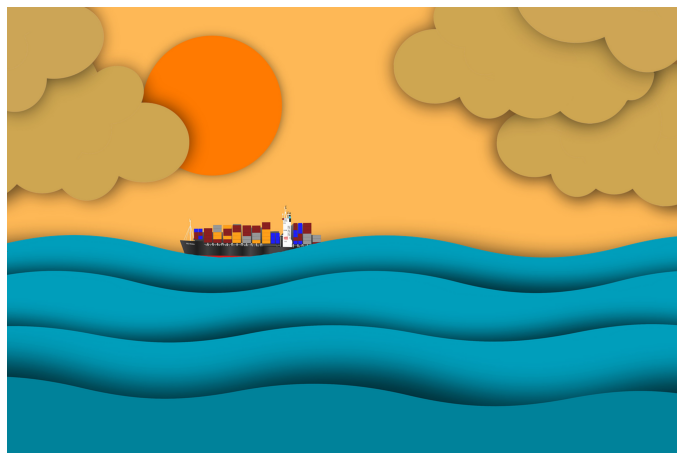

True

In [10]:
# show the images
plt.imshow(translated_image[:, :, ::-1])
plt.axis('off')
plt.show()
print('\n')
plt.imshow(image[:, :, ::-1])
plt.axis('off')
plt.show()
cv2.imwrite('translated_image.jpg', translated_image)